In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\A2010578\OneDrive\Github\EBA-3500\site':
  os.chdir(r'C:\Users\A2010578\OneDrive\Github\EBA-3500\site')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\A2010578\AppData\Local\Temp\ipykernel_1872\1491666059.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Pyth

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

rng = np.random.default_rng(seed=313)
x = rng.uniform(0, 1, 10000)

In [3]:
means = np.cumsum(x) / (np.arange(len(x)) + 1)

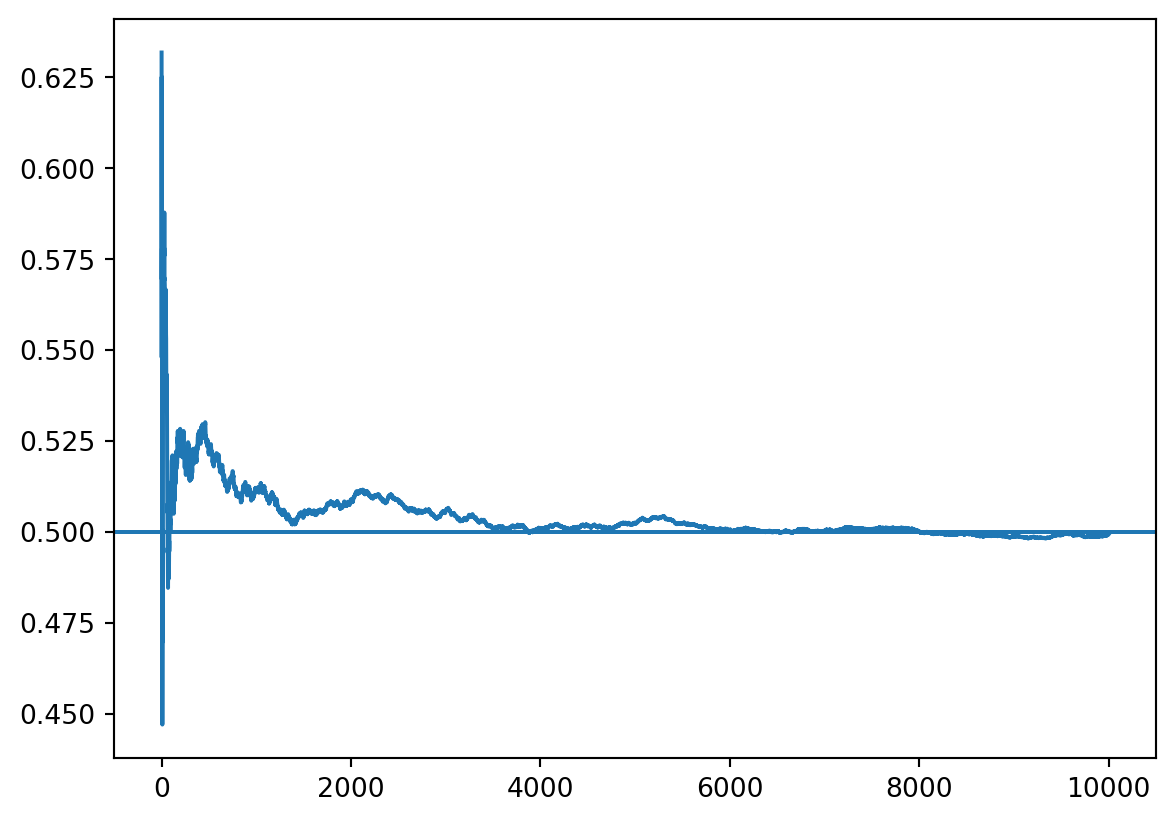

In [4]:
plt.plot(means)
plt.axhline(y = 0.5)
plt.show()

In [5]:
import numpy as np
rng = np.random.default_rng(seed=313)

n = 100
x = rng.gamma(3, 4, (n, 10000))
means = x.mean(axis = 0)
rescaled = np.sqrt(n) * (means - x.mean()) / np.std(x, ddof = 1)

In [6]:
normals = rng.standard_normal(10000)

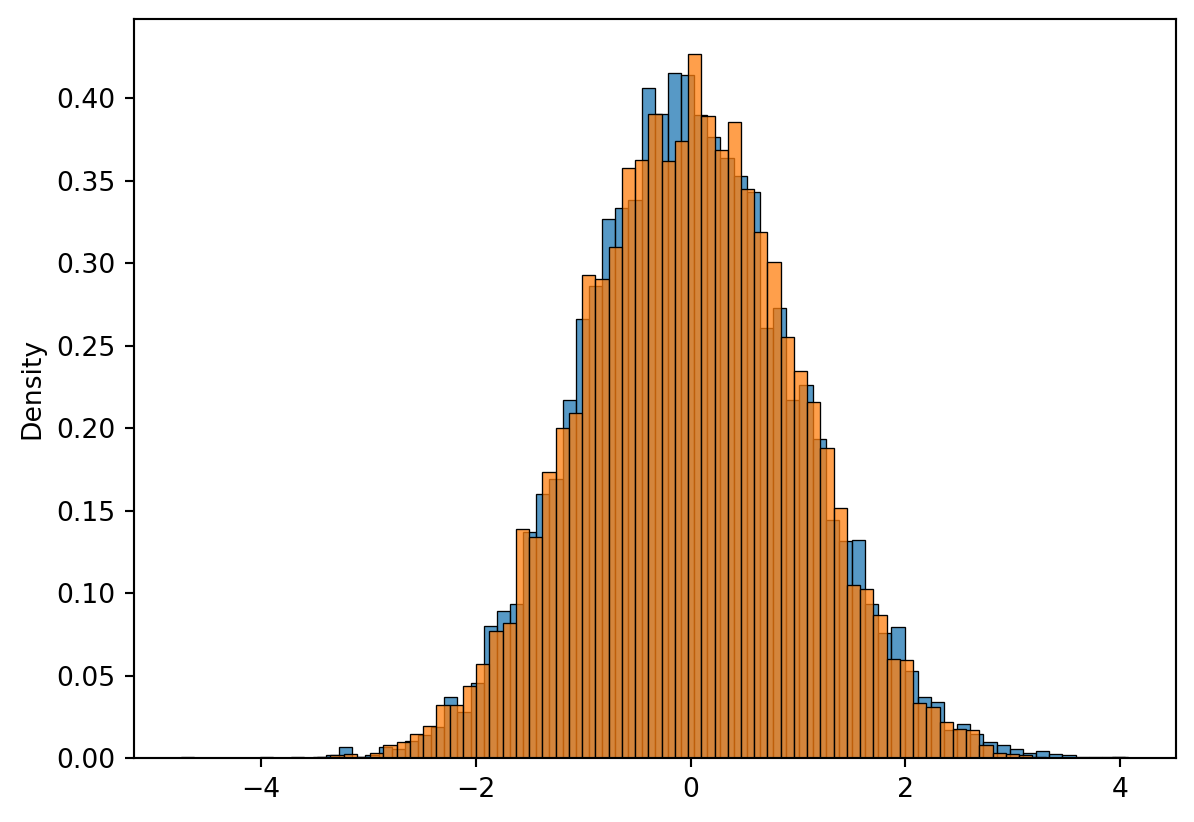

In [7]:
import seaborn as sns
import matplotlib.pylab as plt
plt.clf()
sns.histplot(rescaled, stat = "density")
sns.histplot(normals, stat = "density")
plt.show()

In [8]:
from scipy.stats import norm 
norm.ppf(0.95, loc=0, scale=1)

1.6448536269514722